In [1]:
!pip install pydub

In [10]:
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
from scipy.fft import fft, ifft

#input_filename=input("Please input the audio file:")
#input_file=AudioSegment.from_file(input_filename)
input_file=AudioSegment.from_file("test4.mp3")

#noise_filename=input("Please input the noise file:")
#noise_file=AudioSegment.from_file(noise_filename)
noise_file=AudioSegment.from_file("noise3.mp3")

input_array=np.array(input_file.get_array_of_samples())
noise_array=np.array(noise_file.get_array_of_samples())

for i in range(len(noise_array),len(input_array),1):
  noise_array.append(np.mean(np.abs(noise_array)))
noise_array=noise_array[:len(input_array)]
input_array=fft(input_array)
noise_array=fft(noise_array)

for i in range(0,len(input_array),1):
  if(np.abs(noise_array[i])>0.1*np.abs(input_array[i])):
    input_array[i]=0

output_array=ifft(input_array)


output=AudioSegment(output_array.astype(np.int16).tobytes(),
          frame_rate=input_file.frame_rate,
          sample_width=input_file.sample_width,
          channels=input_file.channels)
output.export("output3.mp3", format="mp3")
#play(input_file)
#play(output)

<ipython-input-10-d6e8b62dcae5>:30: ComplexWarning: Casting complex values to real discards the imaginary part
  output=AudioSegment(output_array.astype(np.int16).tobytes(),


<_io.BufferedRandom name='output3.mp3'>

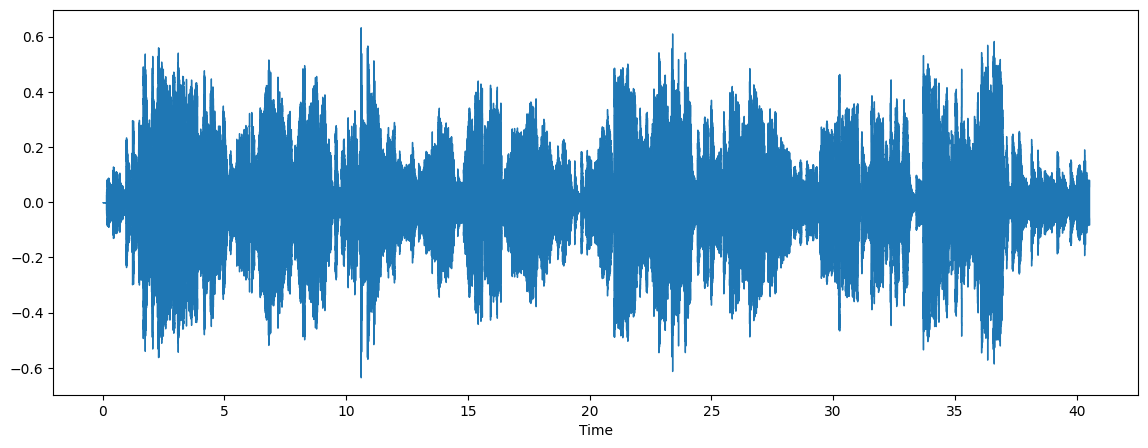

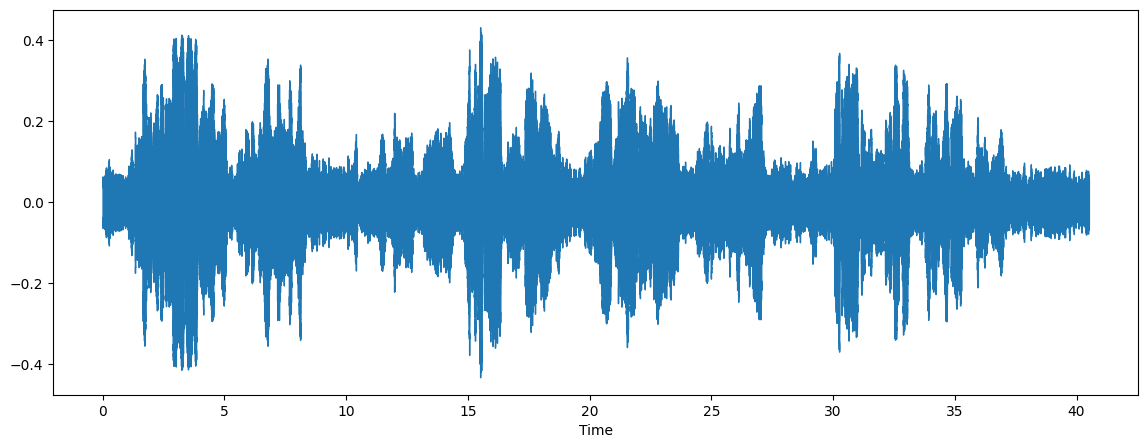

In [11]:
input_file.export("test3.wav",format="wav")
output.export("output3.wav", format="wav")
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import librosa

x1, sr1 = librosa.load('test3.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x1, sr=sr1)

x2, sr2 = librosa.load('output3.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x2, sr=sr2)

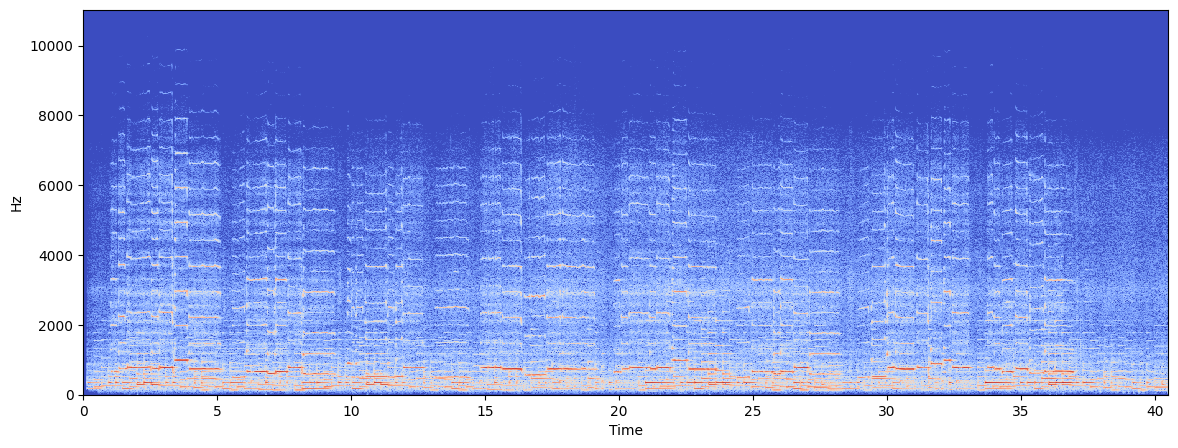

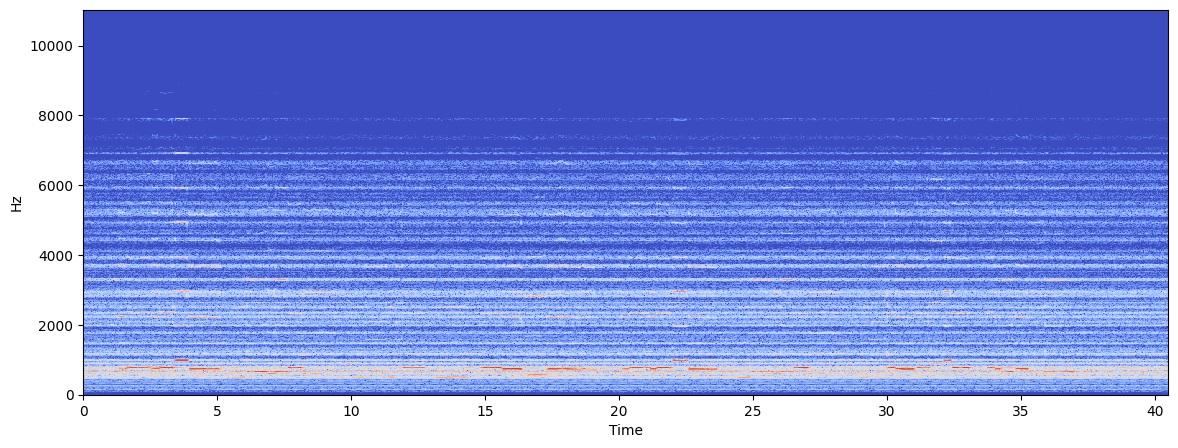

In [12]:
x1 = librosa.stft(x1)
xdb1 = librosa.amplitude_to_db(abs(x1))
plt.figure(figsize=(14, 5))
librosa.display.specshow(xdb1, sr=sr1, x_axis='time', y_axis='hz')

x2 = librosa.stft(x2)
xdb2 = librosa.amplitude_to_db(abs(x2))
plt.figure(figsize=(14, 5))
librosa.display.specshow(xdb2, sr=sr2, x_axis='time', y_axis='hz')